<img src="../logo/logo_ev2017.png">

# Table of Contents
* [1. Pandas](#1.-Pandas)
	* [1.1 DataFrames](#1.1-DataFrames)
		* [1.1.1 Crear un DataFrame](#1.1.1-Crear-un-DataFrame)
	* [1.2 Cargar Datasets mediante Pandas](#1.2-Cargar-Datasets-mediante-Pandas)
	* [1.4 Exportando DataFrames](#1.4-Exportando-DataFrames)
	* [1.5 Operaciones del álgebra relacional. Función Merge](#1.5-Operaciones-del-álgebra-relacional.-Función-Merge)
	* [1.6 Acceso a los datos (filas y columnas)](#1.6-Acceso-a-los-datos-%28filas-y-columnas%29)
	* [1.7 Actualización de datos de un DataFrame](#1.7-Actualización-de-datos-de-un-DataFrame)
		* [1.7.1 Modificando valores del DataFrame](#1.7.1-Modificando-valores-del-DataFrame)
		* [1.7.2 Borrando columnas en un DataFrame (__pop__ y __drop__)](#1.7.2-Borrando-columnas-en-un-DataFrame-%28__pop__-y-__drop__%29)
		* [1.7.3 Insertar datos en un DataFrame](#1.7.3-Insertar-datos-en-un-DataFrame)
	* [1.8 Tratamiento de valores nulos](#1.8-Tratamiento-de-valores-nulos)
	* [1.9 Consultas](#1.9-Consultas)
	* [1.10 Grupos y funciones de agrupación](#1.10-Grupos-y-funciones-de-agrupación)
	* [1.11 Primeros estadísticos](#1.11-Primeros-estadísticos)
		* [1.11.1 Matriz de correlación](#1.11.1-Matriz-de-correlación)
* [2. Maching Learning](#2.-Maching-Learning)
	* [2.2 Predicción con Arboles de decisión](#2.2-Predicción-con-Arboles-de-decisión)
	* [2.3 Predicción con Random Forest](#2.3-Predicción-con-Random-Forest)


#  Pandas

La librería __pandas__ de Python proporciona estructuras de datos de alto nivel y herramientas diseñadas específicamente para conseguir un análisis de los datos rápido y sencillo.

* Pandas está construida sobre la librería __NumPy__

__Aspectos más importantes__:
    
* Ofrece una estructurade datos bidimensional : DataFrame
* Filas y  columnas indexadas (Selección de filas y columas a través de su nombre)
* Selección mediante máscaras
* Permite el tratamiento de datos perdidos (missing data)
* Operaciones elemento a elemento (sin iteración al igual que en NumPy)
* Soporta Grupos y operaciones de agrupación
* Amplia gama de operaciones estadísticas (mean, std, corr, etc.)
* Operaciones aritméticas y operaciones del álgebra relacional (Merging, joining, data set concatenation)

In [52]:
import numpy as np
import pandas as pd     # importamos el módulo pandas

In [53]:
import os
os.chdir('C:/Users/Alberto/Documents/GitHub/sasa/mod3/Tema_1')

##  DataFrames

La estructura __DataFrame__ está diseñada para manejar datos representados en forma de tabla. Esta será la estructura de datos más habitual.
* Las filas están indexadas.
    * Podemos verlo como filas con nombre. Por defecto, si no decimos otra cosa, dicho nombre será un número entero
* Las columnas están etiquetadas.
    * La etiqueta se corresponde con el nombre de la columna.

Un __DataFrame__ puede verse como una tabla de SQL o una hoja de cálculo.


###  Crear un DataFrame

Hay varias formas de crear un __DataFrame__. Podemos crearlo indicando los datos que contiene y el nombre de las columnas.

In [7]:
# crear un array de tuplas
clientes = ['Rafa','Rafa','Antonio','Pedro','Elena']
importes = [968, 155, 77, 578, 100]

lista_datos = list(zip(clientes, importes))
lista_datos

[('Rafa', 968), ('Rafa', 155), ('Antonio', 77), ('Pedro', 578), ('Elena', 100)]

In [3]:
zip?

In [8]:
# crear un DataFrame
tabla = pd.DataFrame( data    = lista_datos,            # lista de tuplas
                      columns = ['nombres_clientes', 'importe_factura'])  
tabla

,nombres_clientes,importe_factura
0,Rafa,968
1,Rafa,155
2,Antonio,77
3,Pedro,578
4,Elena,100


La función __describe__ permite hacer un análisis de los datos de cada una de las columnas de la tabla mostrando varias medidas estadísticas. Los datos que muestra son mínimo valor, máximo, media, percentiles, etc. de las columnas numéricas (variables cuantitativas). En caso de las columnas de otro tipo (string, tipo fecha) muestra otro tipo de valores (cantidad de valores, cantidad de valores distintos, etc).

Como podemos ver, el intérprete de Python indexa las filas con un número entero comenzando por el cero (0,1, ...).

In [9]:
# analisis de los datos de las columnas
tabla.describe()    # por defecto, medidas para variables cuantitativas

,importe_factura
count,5.000000
mean,375.600000
std,389.128899
min,77.000000
25%,100.000000
50%,155.000000
75%,578.000000
max,968.000000


In [11]:
tabla.shape

(5, 2)

También es posible crear un __DataFrame__ a partir de un diccionario. 
* Las claves del diccionario serán los nombres de las columnas 
* Los valores del diccionario constituirán las filas

In [12]:
datos = {"clientes" : ['Rafa','Rafa','Antonio','Pedro','Elena'], 
         "importes" : [968, 155, 77, 578, 100]
         }
mi_tabla = pd.DataFrame(datos, index = [1971, 1971, 1985, 1985, 1987])
mi_tabla.head()

,clientes,importes
1971,Rafa,968
1971,Rafa,155
1985,Antonio,77
1985,Pedro,578
1987,Elena,100


* Podemos crear un DataFrame indexando las filas con un tipo de dato que no sea por defecto (int).
* Podemos crear un DataFrame cambiando la posición de las columnas, incluso con menos columnas.

En el caso de DataFrames, los principales atributos son los siguientes:

* __columns__ : devuelve las etiquetas de las columnas del DataFrame
* __index__ : devuelve los índices de las filas del DataFrame
* __values__ : devuelve los datos del DataFrame. 


In [16]:
mi_tabla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1971 to 1987
Data columns (total 2 columns):
clientes    5 non-null object
importes    5 non-null int64
dtypes: int64(1), object(1)
memory usage: 120.0+ bytes


In [18]:
mi_tabla.loc[1971]['clientes']

1971    Rafa
1971    Rafa
Name: clientes, dtype: object

In [6]:
mi_tabla.columns

Index(['clientes', 'importes'], dtype='object')

In [14]:
mi_tabla.index

Int64Index([1971, 1971, 1985, 1985, 1987], dtype='int64')

Los datos del DateFrame se pueden obtener usando el atributo __values__. El resultado será un array de NumPy:

In [15]:
mi_tabla.values

array([['Rafa', 968],
       ['Rafa', 155],
       ['Antonio', 77],
       ['Pedro', 578],
       ['Elena', 100]], dtype=object)

In [9]:
type(mi_tabla.values)

numpy.ndarray

##  Cargar Datasets mediante Pandas

Pandas es capaz de leer datos de ficheros en formatos:
     * csv, 
     * txt,
     * excel, 
     * json, 
     * html,
     * xml, 
     * ...

Las funciones  más utilizadas en pandas para leer datos en formato texto son __read_csv__ y __read_table__. Estas funciones ofrecen una gran flexibilidad a la hora de leer un fichero de texto plano.

__Ejemplo 1__

El dataset [HR_comma.csv  (612 KB)](./datos/HR_comma.csv) contiene ciertos registros relacionados con los empleados de una empresa de los últimos 5 años.

In [20]:
tabla = pd.read_csv('./datos/HR_comma.csv')
tabla.head(6)    # muestro solo las 6 primeras entradas

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario
0,0.38,0.53,2.0,157,3,0,1.0,0,sales,low
1,0.80,0.86,5.0,262,6,0,1.0,0,sales,medium
2,0.11,0.88,7.0,272,4,0,1.0,0,NaN,medium
3,0.72,0.87,5.0,223,5,0,1.0,0,sales,low
4,0.37,0.52,NaN,159,3,0,1.0,0,sales,low
5,0.41,0.50,2.0,153,3,0,1.0,0,sales,low


In [21]:
pd.read_excel?

Podemos preguntar por la forma que tiene el DataFrame:

In [22]:
tabla.shape       # informa del número de filas y columnas

(14999, 10)

La función __info__ nos proporciona más información. Nombre de las variables, su tipo, el número de valores no nulos, etc.

In [23]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
nivel_de_satisfaccion    14999 non-null float64
ultima_encuesta          14999 non-null float64
numero_de_proyectos      14998 non-null float64
media_horas_mes          14999 non-null int64
horas_en_la_empresa      14999 non-null int64
accidente_de_trabajo     14999 non-null int64
deja_la_empresa          14998 non-null float64
promociona               14999 non-null int64
dep                      14998 non-null object
salario                  14997 non-null object
dtypes: float64(4), int64(4), object(2)
memory usage: 1.1+ MB


In [24]:
tabla.describe()

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona
count,14999.000000,14999.000000,14998.000000,14999.000000,14999.000000,14999.000000,14998.000000,14999.000000
mean,0.612834,0.716102,3.803174,201.050337,3.498233,0.144610,0.238032,0.021268
std,0.248631,0.171169,1.232546,49.943099,1.460136,0.351719,0.425893,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


__Ejemplo 2:__

Si no nos interesan todas las columnas, podemos indicar mediante una lista las columnas en las que estamos interesados.

In [15]:
columnas_carga = ['nivel_de_satisfaccion', 'numero_de_proyectos', 'dep', 'salario' ]
tabla = pd.read_csv('./datos/HR_comma.csv',
                     usecols = columnas_carga )

tabla.head(6)    # muestro solo las 6 primeras entradas

,nivel_de_satisfaccion,numero_de_proyectos,dep,salario
0,0.38,2.0,sales,low
1,0.80,5.0,sales,medium
2,0.11,7.0,NaN,medium
3,0.72,5.0,sales,low
4,0.37,NaN,sales,low
5,0.41,2.0,sales,low


__Ejemplo 3:__

También nos puede interesar que alguna de las columnas sea el índice de la tabla. Por ejemplo, la columna de departamento.

In [16]:
columnas_carga = ['nivel_de_satisfaccion', 'numero_de_proyectos', 'dep', 'salario' ]
tabla = pd.read_csv('./datos/HR_comma.csv',
                     usecols = columnas_carga, 
                     index_col = [2])

tabla.tail(15)    # muestro solo las 15 últimas filas

,nivel_de_satisfaccion,numero_de_proyectos,salario
dep,,,
technical,0.40,2.0,medium
technical,0.91,5.0,medium
technical,0.85,4.0,low
technical,0.90,5.0,low
technical,0.46,2.0,low
technical,0.43,2.0,low
support,0.89,5.0,low
support,0.09,6.0,low
support,0.40,2.0,low


__Ejemplo 4:__

Movilens Dataset recoge datos películas, valoraciones y etiquetas. La información se distribuye en 3 tablas.

- ratings.dat (252 MB)) - El fichero recoge 10.000.054  valoraciones  de los usuarios
- [tags.dat](./datos/ml-10M/movies.dat) (3.5 MB) - Contiene 95.580 etiquetas 
- movies.dat (510 KB) - Datos de 10.681 películas

Toda esta información ha sido recogida por el sistema de recomendación online MovieLens y se utiliza con mucha frecuencia en los sistemas de recomendación que aplican algoritmos de aprendizaje.

La url para descargar los datos:     http://grouplens.org/datasets/movielens/

In [8]:
ruta_ratings = 'C:/Users/Alberto/Documents/GitHub/sasa/mod3/Tema_1/datos/ml-10m/ratings.dat'
ruta_tags = 'C:/Users/Alberto/Documents/GitHub/sasa/mod3/Tema_1/datos/ml-10m/tags.dat'

Tenemos la posibilidad de cargar solo algunas filas, para ver el aspecto de los datos.

In [13]:
# Parseo de fechas 
from datetime import datetime
dateparse = lambda x: datetime.fromtimestamp(float(x))

df_ratings = pd.read_csv(ruta_ratings, sep = '::', header = None,
                         names = ['UserID', 'MovieID', 'Starts', 'Date'],
                         engine ='python',
                         nrows = 3000,
                         parse_dates=[3], date_parser=dateparse) 
# nrows -> recibe el numero de filas con las que quedarse del fichero
# parse_date -> recibe que columnas tienen fechas que deben ser parseadas
# date_parser -> recibe un objeto funcion (lambda) que parsee fechas
# engine -> se especifica el engine de parseo , con 'python' permite tener sep > 2 caracteres

In [11]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
UserID     3000 non-null int64
MovieID    3000 non-null int64
Starts     3000 non-null float64
Date       3000 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 93.8 KB


In [12]:
#df_ratings.head()

,UserID,MovieID,Starts,Date
0,1,122,5.0,1996-08-02 13:24:06
1,1,185,5.0,1996-08-02 12:58:45
2,1,231,5.0,1996-08-02 12:56:32
3,1,292,5.0,1996-08-02 12:57:01
4,1,316,5.0,1996-08-02 12:56:32


__Ejemplo:__

In [15]:
# Este ejemplo es igual que el anterior a excepcion del uso de index_col para darle nombre a los indices

# Parseo de fechas 
from datetime import datetime
dateparse = lambda x: datetime.fromtimestamp(float(x))

df_ratings_2 = pd.read_csv(ruta_ratings, sep = '::', header = None,
                         names = ['id_usuario', 'id_peli', 'puntuacion', 'Fecha'],
                         engine ='python',
                         nrows = 3000,
                         index_col =['id_usuario', 'id_peli'],
                         parse_dates=[3], date_parser=dateparse) 

In [22]:
df_ratings_2

puntuacion               Fecha
id_usuario id_peli                                
1          122             5.0 1996-08-02 13:24:06
           185             5.0 1996-08-02 12:58:45
           231             5.0 1996-08-02 12:56:32
           292             5.0 1996-08-02 12:57:01
           316             5.0 1996-08-02 12:56:32
           329             5.0 1996-08-02 12:56:32
           355             5.0 1996-08-02 13:14:34
           356             5.0 1996-08-02 13:00:53
           362             5.0 1996-08-02 13:21:25
           364             5.0 1996-08-02 13:01:47
           370             5.0 1996-08-02 13:16:36
           377             5.0 1996-08-02 13:03:54
           420             5.0 1996-08-02 13:03:54
           466             5.0 1996-08-02 13:17:59
           480             5.0 1996-08-02 13:00:53
           520             5.0 1996-08-02 13:17:59
           539             5.0 1996-08-02 13:07:48
           586             5.0 1996-08-02 13:07:48
           588             5.0 1996-08-02 12:55:39
           589             5.0 1996-08-02 13:02:58
           594             5.0 1996-08-02 13:17:59
           616             5.0 1996-08-02 13:22:21
2          110             5.0 1997-07-07 05:22:57
           151             3.0 1997-07-07 05:34:10
           260             5.0 1997-07-07 05:02:42
           376             3.0 1997-07-07 05:25:20
           539             3.0 1997-07-07 05:31:02
           590             5.0 1997-07-07 05:20:08
           648             2.0 1997-07-07 05:04:59
           719             3.0 1997-07-07 05:29:51
...                        ...                 ...
34         474             4.0 2001-02-18 16:38:43
           479             3.0 2001-02-10 18:29:36
           480             4.0 2001-02-10 18:06:33
           481             2.0 2001-02-10 18:09:35
           485             2.0 2001-02-18 17:15:52
           491             4.0 2001-02-10 18:09:11
           493             2.0 2001-02-07 16:55:28
           500             3.0 2001-02-10 18:11:41
           502             2.0 2001-02-18 17:16:21
           504             2.0 2001-02-18 17:08:42
           505             2.0 2001-02-18 17:15:52
           508             3.0 2001-02-10 18:03:57
           509             2.0 2001-02-18 16:56:38
           511             3.0 2001-02-18 16:51:18
           516             3.0 2001-02-18 16:59:19
           517             2.0 2001-02-18 17:02:13
           520             1.0 2001-02-18 17:01:38
           524             3.0 2001-02-10 18:05:53
           527             5.0 2001-02-07 16:43:01
           528             1.0 2001-02-18 17:10:55
           529             3.0 2001-02-18 16:39:21
           531             3.0 2001-02-18 16:35:32
           539             3.0 2001-02-10 18:12:24
           540             3.0 2001-02-18 17:19:57
           541             3.0 2001-02-07 16:39:55
           542             4.0 2001-02-10 18:32:25
           546             1.0 2001-02-18 17:21:41
           547             3.0 2001-02-18 17:08:02
           551             3.0 2001-02-07 16:57:16
           552             4.0 2001-02-10 18:14:39

[3000 rows x 2 columns]

##  Exportando DataFrames

Para exportar un DataFrame a un fichero con extensión __csv__  utilizamos la función [__to_csv__](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html). Para exportar un DataFrame a un fichero con extensión __xlsx__ utilizamos la función __to_excel__:
* Ambas funciones admiten una gran cantidad de parámetros. Opcionalmente podemos generar un fichero csv/xlsx con cabeceras o sin ellas, con índices o sin ellos.

In [17]:
df_ratings_2.to_excel('C:/Users/Alberto/Documents/GitHub/sasa/mod3/Tema_1/datos/ml-10m/resultado.xlsx',
                      header = True, index = False)

##  Operaciones del álgebra relacional. Función Merge

Es la operación __join__ al estilo del álgebra relacional. Permite combinar filas  de dos o más tablas (DataFrames) basándose en una o varias claves. 
Hay tres tipos de __merge__: 
    * interno (inner), 
    * externo (outer), 
    * cruzado(left, right)


In [24]:
d1 ={'País' : ['Estonia','Estonia', 'Ireland', 'Spain'],
     'Cantidad' : [  8.4,  6.7 ,    227,  58.9 ] , 
     'Producto' : ['A', 'B', 'A', 'Z'] }
     
d2 ={'Producto' : ['A', 'B', 'C'],
     'Descripción' : [  'Leche',  'Cereales',   'Aceite' ] }
    

In [25]:
t1 = pd.DataFrame( d1 )
t1

,País,Cantidad,Producto
0,Estonia,8.4,A
1,Estonia,6.7,B
2,Ireland,227.0,A
3,Spain,58.9,Z


In [26]:
t2 = pd.DataFrame( d2 )
t2

,Producto,Descripción
0,A,Leche
1,B,Cereales
2,C,Aceite


La función `pd.merge` permite combinar los dataframes `t1` y `t2`  usando como campos de combinación la columna `Producto`. Veamos ejemplos con distintas opciones:

In [27]:
result = pd.merge(t1, t2, on = ['Producto'])               
result

,País,Cantidad,Producto,Descripción
0,Estonia,8.4,A,Leche
1,Ireland,227.0,A,Leche
2,Estonia,6.7,B,Cereales


La opción `left` combina dos dataframes devolviendo aquellas filas que tienen valores idénticos en las columnas que se comparan para unir ambas tablas, y todas las filas del dataframe de la izquierda, tengan o no correspondencia con las filas del dataframe de la derecha. Las que no tengan correspondencia se rellenan con `NaN`.

In [28]:
result = pd.merge(t1, t2, on=['Producto'], how='left')
result

,País,Cantidad,Producto,Descripción
0,Estonia,8.4,A,Leche
1,Estonia,6.7,B,Cereales
2,Ireland,227.0,A,Leche
3,Spain,58.9,Z,NaN


La opción `outer` combina los dos dataframes devolviendo la unión de las filas devueltas por la opción `left` y `right`:

In [29]:
result = pd.merge(t1, t2,  how='outer', on=['Producto']).pais  == 'es'
result

AttributeError: 'DataFrame' object has no attribute 'pais'

In [ ]:
pd.merge?

## Acceso a los datos (filas y columnas)

Para acceder a las columnas, podemos usar la notación '.' (como si fuera un atributo) o con la notación empleada en los diccionarios, utilizando como clave el nombre de la columna.

In [18]:
import os
os.chdir('C:/Users/Alberto/Documents/GitHub/sasa/mod3/Tema_1')

In [19]:
tabla = pd.read_csv('./datos/HR_comma.csv')
tabla.head()

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario
0,0.38,0.53,2.0,157,3,0,1.0,0,sales,low
1,0.80,0.86,5.0,262,6,0,1.0,0,sales,medium
2,0.11,0.88,7.0,272,4,0,1.0,0,NaN,medium
3,0.72,0.87,5.0,223,5,0,1.0,0,sales,low
4,0.37,0.52,NaN,159,3,0,1.0,0,sales,low


In [20]:
tabla.salario # acceso a las columnas con notacion ~ SQL
# esta notacion no funcionaria si hay espacios en blanco

0           low
1        medium
2        medium
3           low
4           low
5           low
6           low
7           low
8           low
9           low
10          low
11          NaN
12          low
13          low
14          low
15          NaN
16          low
17          low
18          low
19          low
20          low
21          low
22          low
23          low
24          low
25          low
26          low
27          low
28          low
29          low
          ...  
14969    medium
14970    medium
14971    medium
14972    medium
14973    medium
14974    medium
14975    medium
14976    medium
14977    medium
14978    medium
14979    medium
14980      high
14981       low
14982    medium
14983    medium
14984    medium
14985    medium
14986       low
14987       low
14988       low
14989       low
14990       low
14991       low
14992       low
14993       low
14994       low
14995       low
14996       low
14997       low
14998       low
Name: salario, Length: 1

In [21]:
tabla[ 'salario' ]    #  Acceso a las columnas utilizando notación corchetes 

0           low
1        medium
2        medium
3           low
4           low
5           low
6           low
7           low
8           low
9           low
10          low
11          NaN
12          low
13          low
14          low
15          NaN
16          low
17          low
18          low
19          low
20          low
21          low
22          low
23          low
24          low
25          low
26          low
27          low
28          low
29          low
          ...  
14969    medium
14970    medium
14971    medium
14972    medium
14973    medium
14974    medium
14975    medium
14976    medium
14977    medium
14978    medium
14979    medium
14980      high
14981       low
14982    medium
14983    medium
14984    medium
14985    medium
14986       low
14987       low
14988       low
14989       low
14990       low
14991       low
14992       low
14993       low
14994       low
14995       low
14996       low
14997       low
14998       low
Name: salario, Length: 1

In [22]:
tabla.shape, tabla.columns # gracias a ver '.columns' podemos ver que hay un espacio en el index de una columna

((14999, 10),
 Index(['nivel_de_satisfaccion', 'ultima_encuesta', 'numero_de_proyectos',
        'media_horas_mes ', 'horas_en_la_empresa', 'accidente_de_trabajo',
        'deja_la_empresa', 'promociona', 'dep', 'salario'],
       dtype='object'))

En Pandas se utiliza la función __loc__ para realizar un accceso a los datos más eficiente que las notaciones anteriores.

```
loc[filas, columnas]

```

### loc  - indexacion por nombre

In [23]:
# loc es un operador de acceso que fuerza a acceder por los nombres de los indices
resultado = tabla.loc[:, ['nivel_de_satisfaccion','salario']]  #acceso más eficiente
resultado.head()
# en este caso obtenemos un sub-dataframe con dos columnas del original

,nivel_de_satisfaccion,salario
0,0.38,low
1,0.80,medium
2,0.11,medium
3,0.72,low
4,0.37,low


### iloc  - indexacion por indice natural

In [27]:
# iloc es un operador de acceso que fuerza a acceder con indices numericos
resultado = tabla.iloc[:,[0,-1]] # acceso mas eficiente
resultado.head()
# realiza lo mismo que el ejemplo anterior

,nivel_de_satisfaccion,salario
0,0.38,low
1,0.80,medium
2,0.11,medium
3,0.72,low
4,0.37,low


Si queremos saber el número de empleados para cada uno de los valores de salario, podemos obtenerlo mediante la función __value_counts()__.

In [28]:
tabla.salario.value_counts()

low       7314
medium    6446
high      1237
Name: salario, dtype: int64

In [30]:
# Visualizar diagrama de barras
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
serie = tabla.salario.value_counts()

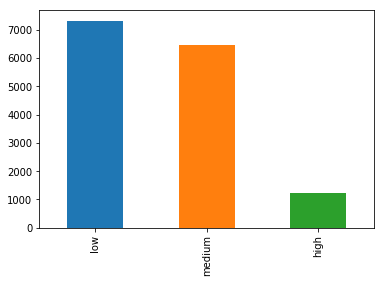

In [31]:
serie.plot(kind='bar');

In [38]:
tabla.accidente_de_trabajo.unique()

array([0, 1], dtype=int64)

In [41]:
emps_salario_bajo = tabla[(tabla.salario == 'low') & (tabla.accidente_de_trabajo == 1)]
emps_salario_bajo

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario
18,0.45,0.51,2.0,160,3,1,1.0,1,sales,low
120,0.14,0.62,4.0,158,4,1,1.0,0,technical,low
123,0.11,0.84,6.0,300,5,1,1.0,0,support,low
136,0.10,0.84,6.0,283,4,1,1.0,0,technical,low
148,0.84,0.88,4.0,263,5,1,1.0,0,marketing,low
276,0.10,0.97,6.0,267,4,1,1.0,0,support,low
279,0.82,0.81,4.0,233,4,1,1.0,0,support,low
283,0.10,0.93,6.0,289,4,1,1.0,0,support,low
293,0.11,0.91,6.0,308,4,1,1.0,0,IT,low
320,0.41,0.54,2.0,153,3,1,1.0,0,sales,low


##  Actualización de datos de un DataFrame

###  Modificando valores del DataFrame

Para actualizar los datos de una columna podemos utilizar un valor concreto:

In [42]:
# Si no existe la variable `sexo` la crea
# Si exite la modifica
# no es posible crearla con otra notacion
tabla['sexo'] = 'FFFFnnnnn'
tabla.head()

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario,sexo
0,0.38,0.53,2.0,157,3,0,1.0,0,sales,low,FFFFnnnnn
1,0.80,0.86,5.0,262,6,0,1.0,0,sales,medium,FFFFnnnnn
2,0.11,0.88,7.0,272,4,0,1.0,0,NaN,medium,FFFFnnnnn
3,0.72,0.87,5.0,223,5,0,1.0,0,sales,low,FFFFnnnnn
4,0.37,0.52,NaN,159,3,0,1.0,0,sales,low,FFFFnnnnn


Modifica una columna existente:

In [43]:
# las operaciones sobre columnas se realizan elemento a elemento
# es una buena forma de crear nuevas columnas en base a las anteriores
# las constantes 'NaN' son omitidas
tabla['numero_de_proyectos'] = tabla['numero_de_proyectos'] + 1
tabla.head()

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario,sexo
0,0.38,0.53,3.0,157,3,0,1.0,0,sales,low,FFFFnnnnn
1,0.80,0.86,6.0,262,6,0,1.0,0,sales,medium,FFFFnnnnn
2,0.11,0.88,8.0,272,4,0,1.0,0,NaN,medium,FFFFnnnnn
3,0.72,0.87,6.0,223,5,0,1.0,0,sales,low,FFFFnnnnn
4,0.37,0.52,NaN,159,3,0,1.0,0,sales,low,FFFFnnnnn


> Las operaciones sobre DataFrames son vectorizadas, al igual que ocurría con las operaciones sobre los objetos ndarray de NumPy.

In [47]:
tabla['media_horas_div_10'] = tabla['media_horas_mes '] / 10
tabla['media_horas_div_10'].head()

0    15.7
1    26.2
2    27.2
3    22.3
4    15.9
Name: media_horas_div_10, dtype: float64

__Ejemplo__:

Podemos crear una nueva columna en el DataFrame, cuyos valores se obtengan a partir del `salario`.

In [48]:
def salario2euros(val):
    if val == 'medium':
        return 200
    elif val == 'low':
        return 100
    elif val == 'high':
        return 300
    else:
        pass # para NaN no devuelve nada

# apply es utilizada para ejecutar una funcion sobre todos los elementos de una SERIE
# map en cambio es mas versatil, se podria utilzar con mas tipados como listas
tabla['salario €'] = tabla.salario.apply(salario2euros)
tabla.head()

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario,sexo,media_horas_div_10,salario €
0,0.38,0.53,3.0,157,3,0,1.0,0,sales,low,FFFFnnnnn,15.7,100.0
1,0.80,0.86,6.0,262,6,0,1.0,0,sales,medium,FFFFnnnnn,26.2,200.0
2,0.11,0.88,8.0,272,4,0,1.0,0,NaN,medium,FFFFnnnnn,27.2,200.0
3,0.72,0.87,6.0,223,5,0,1.0,0,sales,low,FFFFnnnnn,22.3,100.0
4,0.37,0.52,NaN,159,3,0,1.0,0,sales,low,FFFFnnnnn,15.9,100.0


###  Borrando columnas en un DataFrame (__pop__ y __drop__)

La función __pop__ borra la columna especificada del DataFrame y guarda la columna borrada en un objeto de tipo __Serie__.
- Modifica el DataFrame

La función __drop__ permite borrar tanto filas como columnas.
- No modifica el DataFrame. Devuelve el resultado en un nuevo DataFrame.
- No permite acceder a los elementos borrados.

In [49]:
columna_sexo = tabla.pop('sexo') # borra la columna 'sexo' y la asigna a una variable
columna_sexo

0        FFFFnnnnn
1        FFFFnnnnn
2        FFFFnnnnn
3        FFFFnnnnn
4        FFFFnnnnn
5        FFFFnnnnn
6        FFFFnnnnn
7        FFFFnnnnn
8        FFFFnnnnn
9        FFFFnnnnn
10       FFFFnnnnn
11       FFFFnnnnn
12       FFFFnnnnn
13       FFFFnnnnn
14       FFFFnnnnn
15       FFFFnnnnn
16       FFFFnnnnn
17       FFFFnnnnn
18       FFFFnnnnn
19       FFFFnnnnn
20       FFFFnnnnn
21       FFFFnnnnn
22       FFFFnnnnn
23       FFFFnnnnn
24       FFFFnnnnn
25       FFFFnnnnn
26       FFFFnnnnn
27       FFFFnnnnn
28       FFFFnnnnn
29       FFFFnnnnn
           ...    
14969    FFFFnnnnn
14970    FFFFnnnnn
14971    FFFFnnnnn
14972    FFFFnnnnn
14973    FFFFnnnnn
14974    FFFFnnnnn
14975    FFFFnnnnn
14976    FFFFnnnnn
14977    FFFFnnnnn
14978    FFFFnnnnn
14979    FFFFnnnnn
14980    FFFFnnnnn
14981    FFFFnnnnn
14982    FFFFnnnnn
14983    FFFFnnnnn
14984    FFFFnnnnn
14985    FFFFnnnnn
14986    FFFFnnnnn
14987    FFFFnnnnn
14988    FFFFnnnnn
14989    FFFFnnnnn
14990    FFF

In [50]:
tabla.head()     # ha desaparecido la columna 'sexo'

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario,media_horas_div_10,salario €
0,0.38,0.53,3.0,157,3,0,1.0,0,sales,low,15.7,100.0
1,0.80,0.86,6.0,262,6,0,1.0,0,sales,medium,26.2,200.0
2,0.11,0.88,8.0,272,4,0,1.0,0,NaN,medium,27.2,200.0
3,0.72,0.87,6.0,223,5,0,1.0,0,sales,low,22.3,100.0
4,0.37,0.52,NaN,159,3,0,1.0,0,sales,low,15.9,100.0


También es posible utilizar la función __drop__ para eliminar tanto filas como columnas.

In [51]:
# borramos las filas correspondientes a las etiquetas 0 y 3
nuevo_df = tabla.drop([0,3])
nuevo_df.head()

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario,media_horas_div_10,salario €
1,0.80,0.86,6.0,262,6,0,1.0,0,sales,medium,26.2,200.0
2,0.11,0.88,8.0,272,4,0,1.0,0,NaN,medium,27.2,200.0
4,0.37,0.52,NaN,159,3,0,1.0,0,sales,low,15.9,100.0
5,0.41,0.50,3.0,153,3,0,1.0,0,sales,low,15.3,100.0
6,0.10,0.77,7.0,247,4,0,1.0,0,sales,low,24.7,100.0


In [ ]:
tabla.head()     # ojo, después de borrar, la tabla original no se modofica

Para borrar columnas, es necesario indicar en la llamada a la función que queremos actura sobre el eje 1 ( axis = 1 ),  que se corresponde con las columnas.

In [ ]:
# borramos dos columnas
otro = tabla.drop(['nivel_de_satisfaccion', 'ultima_encuesta'], axis = 1)
otro.head()

###  Insertar datos en un DataFrame

Podemos utilizar la función __insert__ para insertar la columna `sexo` que hemos eliminado anteriormente en una determinada posición.

In [ ]:
# inserta la columna en la segunda posición 
tabla.insert(2, 'Sexo_empleado', columna_sexo)
tabla.head()

##  Tratamiento de valores nulos

El término valores perdidos (missing values) se refiere a los valores que no aparecen o que se encuentran marcados con un valor por defecto.
En pandas estos valores vienen marcados como NaN.

Una de las opciones para filtrar estos valores es la función __dropna__.

In [ ]:
tabla.head()

In [ ]:
tabla_sinNAN = tabla.dropna()
tabla_sinNAN.head()

In [ ]:
tabla.head()

En los casos en los no deseamos eliminar filas con valores NaN, podemos sustituir los valores NaN por un valor por defecto. Para ello usamos la función __fillna()__.
* Si queremos un valor por defecto para cada variable, usaremos un diccionario como parámetro de __fillna__.

In [ ]:
# Podemos ver las variables que tienen nulos
tabla.info()

In [54]:
valores = {'numero_de_proyectos': 0, 'dep' : 'otros'}
tabla.fillna(valores).head()

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario,media_horas_div_10,salario €
0,0.38,0.53,3.0,157,3,0,1.0,0,sales,low,15.7,100.0
1,0.80,0.86,6.0,262,6,0,1.0,0,sales,medium,26.2,200.0
2,0.11,0.88,8.0,272,4,0,1.0,0,otros,medium,27.2,200.0
3,0.72,0.87,6.0,223,5,0,1.0,0,sales,low,22.3,100.0
4,0.37,0.52,0.0,159,3,0,1.0,0,sales,low,15.9,100.0


In [ ]:
tabla.head()     # cuidado: fillna no modifica la tabla

##  Consultas

La sección de partes de un DataFrame se realiza mediante máscaras. Veamos algunos ejemplos:

* Selección de tuplas con nivel de satisfacción superior a 0.5

In [ ]:
mascara = tabla.nivel_de_satisfaccion  > 0.5
mascara.head()

In [ ]:
# selección de tuplas que cumplen la máscara
resultado = tabla[mascara]
resultado.head()

In [ ]:
len(resultado)   # número de tuplas devueltas

* Selección de tuplas con nivel de satisfacción superior a 0.5 del departamento `hr`

In [55]:
mascara_sat = tabla.nivel_de_satisfaccion  > 0.5
mascara_hr  = tabla.dep == 'hr'
resultadoC2 = tabla[mascara_sat & mascara_hr]
resultadoC2.head()

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario,media_horas_div_10,salario €
34,0.84,0.87,5.0,246,6,0,1.0,0,hr,low,24.6,100.0
108,0.71,0.87,4.0,177,4,0,1.0,0,hr,medium,17.7,200.0
228,0.85,0.95,6.0,236,5,0,1.0,0,hr,low,23.6,100.0
261,0.82,0.97,6.0,263,5,0,1.0,0,hr,medium,26.3,200.0
379,0.77,0.93,5.0,231,5,0,1.0,0,hr,medium,23.1,200.0


In [ ]:
len(resultadoC2)

* Selección de tuplas con nivel de satisfacción superior a 0.5 del departamento `hr`. Mostrar los resultado ordenados por nivel de satisfacción

In [58]:
resultadoC2.sort_values(by = ['salario','nivel_de_satisfaccion'], ascending=[False,True])

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario,media_horas_div_10,salario €
3999,0.51,0.95,5.0,258,3,0,0.0,0,hr,medium,25.8,200.0
5605,0.51,0.82,4.0,206,4,0,0.0,0,hr,medium,20.6,200.0
6444,0.51,0.75,5.0,175,2,0,0.0,0,hr,medium,17.5,200.0
7817,0.51,0.53,4.0,237,3,0,0.0,0,hr,medium,23.7,200.0
4461,0.52,0.63,4.0,225,3,0,0.0,0,hr,medium,22.5,200.0
6904,0.52,0.62,4.0,160,2,0,0.0,0,hr,medium,16.0,200.0
7438,0.52,0.70,5.0,219,3,0,0.0,0,hr,medium,21.9,200.0
490,0.53,0.56,5.0,281,6,0,1.0,0,hr,medium,28.1,200.0
2245,0.53,0.75,7.0,192,6,0,0.0,0,hr,medium,19.2,200.0
3313,0.53,0.73,5.0,227,3,0,0.0,0,hr,medium,22.7,200.0


##  Grupos y funciones de agrupación

Después de cargar los datos y procesarlos (limpiar y preparar) una de las tareas más habituales es agrupar los datos en base a alguna variable cualitativa, para posteriormente realizar alguna operación sobre cada uno de los grupos obtenidos.

Pandas proporciona la operación __groupby__ para este fin. La operación __groupby__ se define como la unión de tres procesos (dividir-aplicar-combinar los resultados).

__Ejemplo:__

El fichero [tips.csv](./datos/tips.csv) recoge los datos referentes a las reservas de un restaurante. Muestra los datos del precio de la factura, la propina, sexo de la persona que hizo la reserva, el día, el número de comensales, etc.

In [59]:
tips = pd.read_csv('./datos/tips.csv',
                   skiprows = 1,
                   names = ['Importe_Factura', 'Propina', 'Sexo', 'Fumador', 'Dia',
                              'Tipo', 'Comensales']
                          )
tips.head()

,Importe_Factura,Propina,Sexo,Fumador,Dia,Tipo,Comensales
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Deseamos conocer la media del importe de factura dependiendo del sexo y de si el cliente en fumador o no.

In [62]:
tips.groupby(['Sexo','Fumador'])['Importe_Factura'].mean()

Sexo    Fumador
Female  No         18.105185
        Yes        17.977879
Male    No         19.791237
        Yes        22.284500
Name: Importe_Factura, dtype: float64

In [ ]:
tips_g = tips.groupby(['Sexo','Fumador']).Propina.agg([np.max, np.min])
tips_g

__Ejemplo:__
    
Agrupando con funciones:    

In [65]:
df_tags = pd.read_csv(ruta_tags, sep = '::', header = None,
                        engine ='python',
                        names = ['UserID','MovieID','Tag','Timestamp'], 
                        parse_dates=[3], date_parser=dateparse, 
                        index_col = [3])
df_tags.head()

,UserID,MovieID,Tag
Timestamp,,,
2008-07-04 17:17:10,15,4973,excellent!
2007-08-28 03:17:47,20,1747,politics
2007-08-28 03:17:47,20,1747,satire
2007-08-28 03:17:15,20,2424,chick flick 212
2007-08-28 03:17:15,20,2424,hanks


In [66]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95580 entries, 2008-07-04 17:17:10 to 2007-08-28 03:13:09
Data columns (total 3 columns):
UserID     95580 non-null int64
MovieID    95580 non-null int64
Tag        95564 non-null object
dtypes: int64(2), object(1)
memory usage: 2.9+ MB


In [67]:
df_tags.index

DatetimeIndex(['2008-07-04 17:17:10', '2007-08-28 03:17:47',
               '2007-08-28 03:17:47', '2007-08-28 03:17:15',
               '2007-08-28 03:17:15', '2007-08-28 03:17:15',
               '2007-08-28 03:15:55', '2007-08-28 03:15:56',
               '2007-08-28 03:18:00', '2007-08-28 03:18:00',
               ...
               '2007-12-03 03:04:32', '2006-10-29 09:23:41',
               '2006-10-29 13:51:23', '2006-10-29 09:24:26',
               '2007-08-28 03:12:50', '2007-08-28 03:12:51',
               '2007-08-28 03:13:26', '2007-08-28 03:13:46',
               '2007-08-28 03:12:45', '2007-08-28 03:13:09'],
              dtype='datetime64[ns]', name='Timestamp', length=95580, freq=None)

In [84]:
df_tags['2009-01-02 01:06:08':'2009-01-04'].sort_index()

,UserID,MovieID,Tag
Timestamp,,,
2009-01-02 01:06:09,8624,1805,'sexy'
2009-01-02 01:20:14,30879,65037,autism
2009-01-02 01:20:31,30879,65037,internet
2009-01-02 01:20:40,30879,65037,suicide
2009-01-02 01:22:12,30879,65037,fake suicide
2009-01-02 01:22:44,30879,65037,role playing game
2009-01-02 01:23:04,30879,65037,based on novel
2009-01-02 01:24:11,30879,65037,asperger's syndrome
2009-01-02 03:41:32,39689,60756,brother-brother relationship


In [85]:
from datetime import datetime, date, time

def calcular_dia(f):
    return f.weekday()    # devuelve el día de la semana

# calculamos el número de tags realizados en cada día de la semana
# agrupar + aplicar + combinar
df_tags.groupby(calcular_dia).UserID.count() 

0    13515
1    14709
2    13133
3    11700
4    14477
5    14176
6    13870
Name: UserID, dtype: int64

In [94]:
df_tags['weekday'] = df_tags.index.map(calcular_dia)

# podriamos haber utilizado apply() si df_tags.index fuera una SERIE para aplicar una funcion
# ademas, podriamos utilizar applymap() para asignar un valor a todos los elementos de la tabla

In [ ]:
# al utilizar groupby() sin indicar la(s) columna(s), se aplicara (si introducida) una funcion al index

##  Primeros estadísticos

La librería __Pandas__ ofrece una colección de operaciones estadísticas basadas en las mismas operaciones  de la librería Numpy. En el caso de pandas, todas ellas ignoran los valores NaN.



In [ ]:
tabla.mean()

In [ ]:
# número de empleados que han dejado la empresa
tabla['deja_la_empresa'].sum()

In [ ]:
tabla['nivel_de_satisfaccion'].std()

### Matriz de correlación

Cargamos de nuevo la tabla:

In [95]:
tabla = pd.read_csv('./datos/HR_comma.csv')
tabla.head(3)    # muestro solo las 3 primeras entradas

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario
0,0.38,0.53,2.0,157,3,0,1.0,0,sales,low
1,0.80,0.86,5.0,262,6,0,1.0,0,sales,medium
2,0.11,0.88,7.0,272,4,0,1.0,0,NaN,medium


In [96]:
corrmat = tabla.corr()
corrmat

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona
nivel_de_satisfaccion,1.000000,0.105021,-0.143080,-0.020048,-0.100866,0.058697,-0.388316,0.025605
ultima_encuesta,0.105021,1.000000,0.349261,0.339742,0.131591,-0.007104,0.006684,-0.008684
numero_de_proyectos,-0.143080,0.349261,1.000000,0.417168,0.196767,-0.004781,0.024145,-0.006079
media_horas_mes,-0.020048,0.339742,0.417168,1.000000,0.127755,-0.010143,0.071427,-0.003544
horas_en_la_empresa,-0.100866,0.131591,0.196767,0.127755,1.000000,0.002120,0.144879,0.067433
accidente_de_trabajo,0.058697,-0.007104,-0.004781,-0.010143,0.002120,1.000000,-0.154590,0.039245
deja_la_empresa,-0.388316,0.006684,0.024145,0.071427,0.144879,-0.154590,1.000000,-0.061777
promociona,0.025605,-0.008684,-0.006079,-0.003544,0.067433,0.039245,-0.061777,1.000000


Text(0.5,1,'Correlación entre las variables')

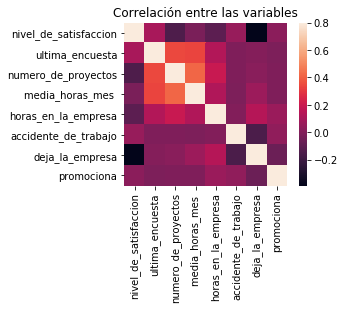

In [97]:
import seaborn as sns

f, ax = plt.subplots(figsize=(4, 3))
# mapa de calor 
sns.heatmap(corrmat, vmax=.8, square=True);
ax.set_title('Correlación entre las variables')

Podemos visualizar la matriz de correlación por salarios. Para ello lo que hacemos es dividir los datos en tres partes:
* los datos de los empleados con salario `low`
* los datos de los empleados con salario `medium`
* los datos de los empleados con salario `high`

In [98]:
# datos de los empleados con salario `low`
mascara_low = tabla['salario'] == 'low'
mascara_low
salario_low = tabla[mascara_low]
len(salario_low)

7314

In [99]:
# datos de los empleados con salario `medium`
mascara_medium = tabla['salario'] == 'medium'
mascara_medium
salario_medium = tabla[mascara_medium]
len(salario_medium)

6446

In [100]:
# datos de los empleados con salario `high`
mascara_high = tabla['salario'] == 'high'
mascara_high
salario_high = tabla[mascara_high]
len(salario_high)

1237

In [102]:
corrmat_low = salario_low.corr()
corrmat_medium = salario_medium.corr()
corrmat_high = salario_high.corr()

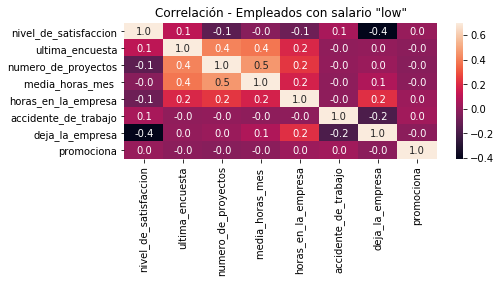

In [103]:
# mapa de calor 
f, ax = plt.subplots(figsize=(7, 2.5))
ax = sns.heatmap(corrmat_low, vmax=.7, square=False, annot=True, fmt='.1f');
ax.set_title('Correlación - Empleados con salario "low"');

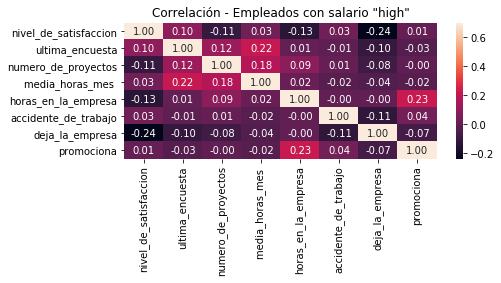

In [104]:
# mapa de calor 
f, ax = plt.subplots(figsize=(7, 2.5))
ax = sns.heatmap(corrmat_high, vmax=.7, square=False, annot=True, fmt='.2f')
ax.set_title('Correlación - Empleados con salario "high"');

#  Maching Learning

__Scikit-learn__ es una librería que incluye la implementación de un gran número de algoritmos de apredizaje, siendo básica para trabajar con __ML__.

La podemos utilizar para realizar _clasificaciones_, _extraccion de características, _regresiones_, _agrupaciones_, _reducción de dimensiones_, _selección de modelos_ o _preprocesamiento_.

Esta librería también nos facilita las tareas de evaluación, diagnostico y validaciones cruzadas ya que nos proporciona varios métodos de fábrica para poder realizar estas tareas de forma muy simple.

¿Se puede predecir la característica `deja_la_empresa` a partir del resto de los datos?

`deja_la_empres` = 1

In [ ]:

from sklearn.preprocessing import LabelEncoder
#from   sklearn.model_selection import train_test_split       # sustituye a cross_validation
from sklearn.cross_validation import train_test_split         # desapare en la versión 0.20
# importando el modelo de regresión logística


from sklearn.calibration import CalibratedClassifierCV
from sklearn.feature_selection import SelectFromModel;

Lo primero que hacemos es convertir las variables categóricas en variables indicadoras. Lo hacemos mediante la función __get_dummies()__.

In [ ]:
tabla = pd.read_csv('./datos/HR_comma.csv')
tabla = tabla.dropna()                             # borramos las observaciones con NaN

# variables categóricas en variables indicadoras
tabla_copy = pd.get_dummies(tabla)                 # guardamos el resultado en una copia
tabla_copy.head()

In [ ]:
tabla_copy.info()      # No hay NaN en la tabla

A continuación, construimos la matriz de variables independientes `X` y la varaible dependiente `y`.

In [ ]:
# y = variable dependiente
y = tabla_copy.pop('deja_la_empresa')
# X = matriz de variables independientes
X = tabla_copy

In [ ]:
y.unique(), len(y)         # valores distintos de la variable y

In [ ]:
X.head()

In [ ]:
len(X)

Para aplicar el modelo de regresión logística, el tipo de los datos (y, X) ha de ser array de NumPy.

In [ ]:
type(y), type(X)

Nos quedamos con los valores de la Serie y del DataFrame

In [ ]:
y = y.values
X = X.values

In [ ]:
type(y), type(X)

Dividimos los datasets en entrenamiento y evaluación:

In [ ]:
# Xtrain con el 80% de los datos
# Xtest  con el 20 de los datos
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20)
len(Xtest), len(Xtest)/len(X),len(Xtrain), len(Xtrain)/len(X)

##  Predicción con Arboles de decisión

In [ ]:
# Importando el arbol de decisión
from sklearn.tree import DecisionTreeClassifier

# Creando el modelo. Árboles con profundidad 3
modelo_ad = DecisionTreeClassifier(max_depth = 3 )     # Creando el modelo
# Ajustando el modelo
modelo_ad.fit(Xtrain, ytrain);


In [ ]:
# calculamos las bondad del ajuste para los datos de test y de entrenamiento
ajuste_test = modelo_ad.score(Xtest, ytest)      #coef de determinación o bondad del ajuste
print('Bondad del ajuste con Árbol de decisión: ', ajuste_test)

##  Predicción con Random Forest

Uno de los métodos más populares usados por los científicos de datos es el algoritmo __Random Forest__, uno de los mejores algoritmos de clasificación, capaz de organizar grandes cantidades de datos con exactitud.

In [ ]:
# Importando el random forest
from sklearn.ensemble import RandomForestClassifier

# Creando el modelo
modelo_rf = RandomForestClassifier()
# Ajustando el modelo
modelo_rf.fit(Xtrain, ytrain)

# Realizando las predicciones
y_predic_test = modelo_rf.predict(Xtest)


In [ ]:
# calculamos las bondad del ajuste para los datos de test y de entrenamiento
ajuste_test = modelo_rf.score(Xtest, ytest)      #coef de determinación o bondad del ajuste
print('Bondad del ajuste con Random Forest: ', ajuste_test)

Parece que el modelo Random forest ofrece mejores resultados. Además podemos conocer las características que más influyen en el modelo. 
En nuestro ejemplo tenemos 20 características: 

In [ ]:
tabla_copy.shape

In [ ]:
# nombres de las características
caracteristicas = tabla_copy.columns.values      
caracteristicas

In [ ]:
# estimación de la importancia de las características
# el valor más alto corresponde a la característica más importante
estimacion = modelo_rf.feature_importances_
estimacion

Emparejamos cada característica con su estimación:

In [ ]:
estimaciones = dict(zip(caracteristicas, estimacion))
estimaciones
valores = pd.DataFrame(estimaciones, index = ['valor'])
valores = valores.T
valores

In [ ]:
plt.figure(figsize=(5, 3))
valores.plot(kind = 'bar',  
             width = 0.3  ,         #anchura de las barras
             align = 'center'
             )
plt.title('Estimación importancia - Random Forest')
plt.ylabel('Importancia estimada')
plt.xlabel('Características')
plt.legend(loc='best')
plt.tight_layout()

# References



* [Python Data Analysis Library](http://pandas.pydata.org/)
* [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)
